In [7]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors



from itertools import combinations
import scipy
from scipy.ndimage.filters import gaussian_filter1d
import sys
import os
import copy
atish_assay_path = 'fitness_assay_grantedits.py'
sys.path.append(os.path.dirname(os.path.expanduser(atish_assay_path)))
import fitness_assay_grantedits as atish

tools_path = '../code/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools

sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
name = 'noF_DoubleBC_merged+flaskswapcorrected_041819' 

merged_data = p.read_csv(f'../data/BarcodeCounts_{name}_withBCinfo.csv')



In [14]:
old_conditions = {
                  '3':['3.1','3.2','3.3'],
                  '6':['6.1','6.2','6.3'],
                  '13':['13.1','13.2','13.3'],
                  '18':['18.1','18.2','18.3'],
                  '20':['20.1','20.2','20.3'],
                  '21':['21.1','21.2','21.3'],
                  '23':['23.1','23.2','23.3']
                 }

bigbatch_conditions = {
                        '1BB_M3':['A','B','C','D'],
                        '1BB_Baffle':['E','F'],
                        '1BB_1.4%Gluc' :['G','H'],
                        '1BB_1.8%Gluc' :['I','J'],
                        '1BB_0.2MNaCl' :['K','L'],
                        '1BB_0.5MNaCl' :['M','N'],
                        '1BB_0.2MNaCl' :['K'], 
                        '1BB_0.2MKCl' :['O'],
                        '1BB_0.5MKCl' :['P'],
#                         '1BB_8.5uMGdA' :['Q','R'],
#                         '1BB_17uMGdA' :['S','T'],
#                         '1BB_2ugFlu' :['U','V'],
#                         '1BB_0.5ugFlu' :['W','X'],
                        '1BB_1%Raf' :['Y','Z'],
                        '1BB_0.5%Raf' :['AA','BB'],
                        '1BB_1%Gly' :['CC','DD'],
#                         '1BB_1%EtOH' :['EE','FF'],
#                         '1BB_SucRaf' :['GG'],
                      }



conditions = {**old_conditions, **bigbatch_conditions}

just_reps = [rep for reps in conditions.values() for rep in reps]

In [15]:
len(just_reps)

42

['3-1-1', '3-2-1', '3-3-1', '3-4-1']
['3-1-2', '3-2-2', '3-3-2', '3-4-2']
['3-1-3', '3-2-3', '3-3-3', '3-4-3']
['6-1-1', '6-2-1', '6-3-1', '6-4-1']
['6-1-2', '6-2-2', '6-3-2', '6-4-2']
['6-1-3', '6-2-3', '6-3-3', '6-4-3']
['13-1-1', '13-2-1', '13-3-1', '13-4-1']
['13-1-2', '13-2-2', '13-3-2', '13-4-2']
['13-1-3', '13-2-3', '13-3-3', '13-4-3']
['18-1-1', '18-2-1', '18-3-1', '18-4-1']
['18-1-2', '18-2-2', '18-3-2', '18-4-2']
['18-1-3', '18-2-3', '18-3-3', '18-4-3']
['20-1-1', '20-2-1', '20-3-1', '20-4-1']
['20-1-2', '20-2-2', '20-3-2', '20-4-2']
['20-1-3', '20-2-3', '20-3-3', '20-4-3']
['21-1-1', '21-2-1', '21-3-1', '21-4-1']
['21-1-2', '21-2-2', '21-3-2', '21-4-2']
['21-1-3', '21-2-3', '21-3-3', '21-4-3']
['23-1-1', '23-2-1', '23-3-1', '23-4-1']
['23-1-2', '23-2-2', '23-3-2', '23-4-2']
['23-1-3', '23-2-3', '23-3-3', '23-4-3']
['A0', 'A1', 'A2', 'A3', 'A4']
['B0', 'B1', 'B2', 'B3', 'B4']
['C0', 'C1', 'C2', 'C3', 'C4']
['D0', 'D1', 'D2', 'D3', 'D4']
['E0', 'E1', 'E2', 'E3', 'E4']
['F0', '

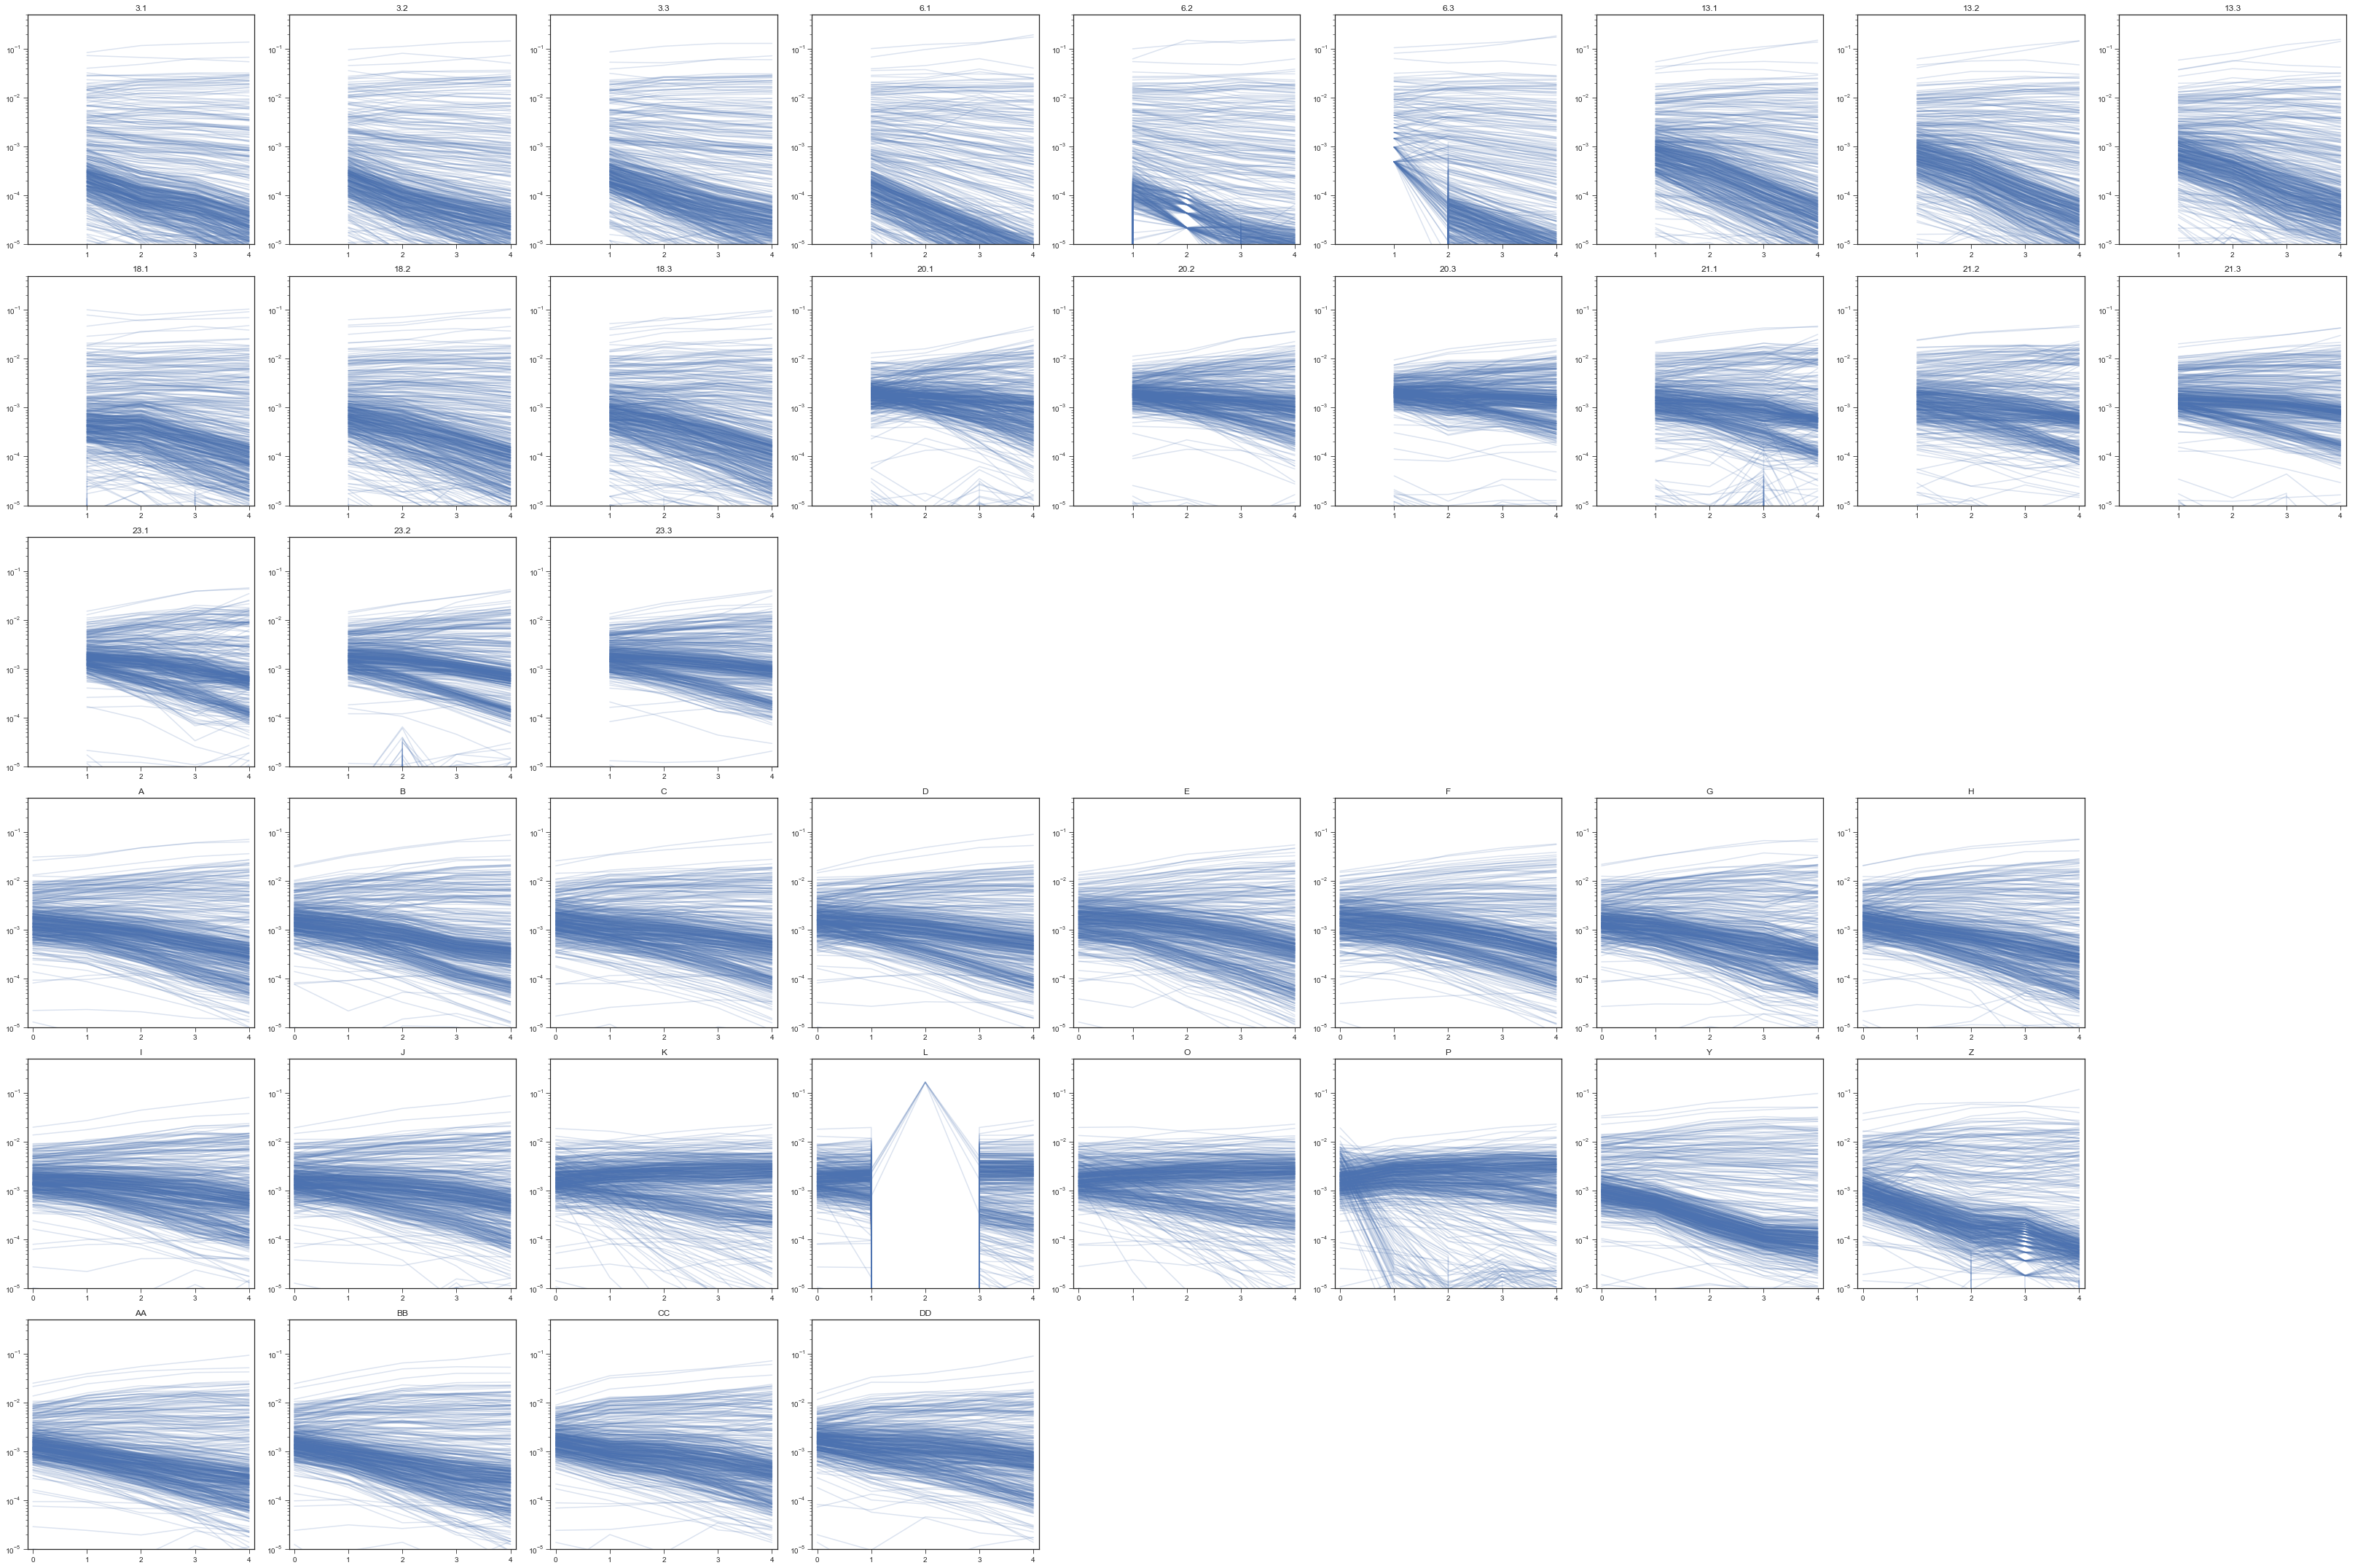

In [6]:
data = merged_data
data = data[~(data['barcode'].isin([7777777,9999999]))]

plt.figure(figsize=(5*9,5*6))
for counter,rep in enumerate(just_reps):
    if rep in  tools.flatten([i for i in bigbatch_conditions.values()]):
        counter = counter + 6
        if counter-26 >= 9:
            counter += 1
        if counter-26 >= 18:
            counter += 1
    ax = plt.subplot(6,9,counter+1)
    timepoints = []
    these_times = []
    if rep in tools.flatten([i for i in old_conditions.values()]):
        e,r = rep.split('.')
#         if e in ['13','15']:
#             timepoints.append(0)
#             these_times.append('13-0_pool')
#         else:
#             if e+'-0' in data.columns:
#                 timepoints.append(0)
#                 these_times.append(e+'-0')

        for t in range(1,5):
            if e+'-'+str(t)+'-'+r in data.columns:
                timepoints.append(t)
                these_times.append(e+'-'+str(t)+'-'+r)

    if rep in tools.flatten([i for i in bigbatch_conditions.values()]):
        for i in range(5):
            if rep+str(i) in data.columns:
                these_times.append(rep+str(i))
                timepoints.append(i)
    print(these_times)
    BC_counts = data[these_times].values
    ax.plot(timepoints,(BC_counts/np.nansum(BC_counts,axis=0)).swapaxes(0,1),alpha=0.2,color='b')
    plt.yscale('log')
#     plt.title(codenames[condition])
    plt.title(rep)
    plt.tight_layout()
    plt.xticks(timepoints,timepoints)
    plt.xlim(-0.1,4.1)
    plt.ylim(10**-5,0.5)
plt.savefig(f'Alltrajectories_old+1bb_swapscorrected_reshape_cutoff.pdf',bbox_inches='tight')

In [46]:
data = merged_data
data = data[~(data['barcode'].isin([7777777,9999999]))]
data = data.sort_values('barcode')
data = data.drop(columns=['L2','6-1-3','6-2-2']) # sparse timepoints resulting a lot of missing data

cov_thresh = 100

### called neutral by atish's method in ALL 5000 bc experiments (I think - need to verify this)
### [could also be below some set threshold across all experiments]
full_neutral_list = [17615,18486,42040,45014,58284,63611,73731,74185,80465,94896
,120600,125697,132511,134852,135750,190551,228237,238783,255561,298344
,308537,316954,317346,335717,411685,454359,469053] 

### from previous list but never has fitness above 3.5% (per gen) in any of 5000bc experiments
supergood_neutral = [17615, 24362, 42040, 71926, 72939, 73802, 80465, 109476, 113483, 
                     134852, 135750, 238783, 263665, 276406, 316954, 335717, 454359] 

### pulled from supergood list and spiked into 1BigBatch experiments
neutral_spikes = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]

# neutrals = full_neutral_list
neutrals = list(np.unique(full_neutral_list+supergood_neutral+neutral_spikes))

neutrals = [bc for bc in data['barcode'].values if bc in neutrals]
# neutrals = neutral_spikes
print(neutrals)

fitnesses = {}

other_info = ['barcode','gene','type','ploidy','class','additional_muts']

for condition,replicates in conditions.items():
    print(condition)
    print(replicates)
    rep_times = {}
    for rep in replicates:
        
        these_times = []
        timepoints = []
        if condition in old_conditions.keys():
            
            e,r = rep.split('.')
#             if e in ['13','15']:
#                 timepoints.append(0)
#                 these_times.append('13-0_pool')
#             else:
#                 if e+'-0' in data.columns:
#                     timepoints.append(0)
#                     these_times.append(e+'-0')
            for t in range(1,5):
                if e+'-'+str(t)+'-'+r in data.columns:
                    timepoints.append(t)
                    these_times.append(e+'-'+str(t)+'-'+r)

        if condition in bigbatch_conditions.keys():
            for i in range(5):
                if rep+str(i) in data.columns:
                    these_times.append(rep+str(i))
                    timepoints.append(i)
        rep_times[rep] = data[these_times].values
        print(timepoints)
        print(rep)
    answer = atish.inferFitness(data['barcode'].values,timepoints,rep_times,
                                neutralBarcodes=neutrals,lowCoverageThresh=cov_thresh,use_all_neutral=True,useMultNoise=True)


    for rep in replicates:

        fitnesses[rep+'_fitness'] = answer[rep]['aveFitness']
        fitnesses[rep+'_error'] = answer[rep]['aveError']

for other_setting in other_info:
    if other_setting in data.columns:
        fitnesses[other_setting] = data[other_setting].values

fitness_df = p.DataFrame(fitnesses)
fitness_df = fitness_df.replace([np.inf, -np.inf], np.nan)
# fitness_df = fitness_df.replace([float('Inf'),-float('Inf'),np.inf, -np.inf], np.nan)

for condition,replicates in conditions.items():
    
    
    fitness_df[condition+'_fitness'] = np.nansum([fitness_df[rep+'_fitness'].values/fitness_df[rep+'_error'].values for rep in replicates],axis=0) \
    /np.nansum([1.0/fitness_df[rep+'_error'].values for rep in replicates],axis=0)
    
    fitness_df[condition+'_error'] = np.nansum([1.0/fitness_df[rep+'_error'].values for rep in replicates],axis=0)**(-1)


    
fitness_df = fitness_df[other_info+[col for col in fitness_df if col not in other_info]]
# fitness_df.to_csv('../data/DoubleBC_Merged_Fitness_Atish_Default_AllConditions.csv',index=False)


[17615, 24362, 42040, 71926, 72939, 73802, 109476, 113483, 120600, 134852, 263665, 298344, 316954]
3
['3.1', '3.2', '3.3']
[1, 2, 3, 4]
3.1
[1, 2, 3, 4]
3.2
[1, 2, 3, 4]
3.3
neutral reads 2880.0 1653.0
neutral reads 1653.0 557.0
neutral reads 557.0 391.0
neutral reads 2880.0 1653.0
neutral reads 1653.0 557.0
neutral reads 557.0 391.0
neutral reads 3939.0 1558.0
neutral reads 1558.0 782.0
neutral reads 782.0 284.0
neutral reads 3939.0 1558.0
neutral reads 1558.0 782.0
neutral reads 782.0 284.0
neutral reads 3368.0 1959.0
neutral reads 1959.0 776.0
neutral reads 776.0 430.0
neutral reads 3368.0 1959.0
neutral reads 1959.0 776.0
neutral reads 776.0 430.0
Multiplicative noise consistency checks

3.1  inconsistent times:

kappas [1.7437897  2.31538368 1.81788505]
multNoise [0.11285201 0.11902568 0.10235688]
No clear inconsistencies


3.2  inconsistent times:

kappas [4.73791928 5.1001428  1.46530054]
multNoise [0.11285201 0.11902568 0.10235688]
No clear inconsistencies


3.3  inconsistent t

/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:218: RuntimeWarning: divide by zero encountered in power
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:218: RuntimeWarning: invalid value encountered in multiply
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:385: RuntimeWarning: divide by zero encountered in log
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:385: RuntimeWarning: invalid value encountered in subtract
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_a

neutral reads 6729.0 5439.0
neutral reads 5439.0 1780.0
neutral reads 1780.0 887.0
neutral reads 6727.0 5437.0
neutral reads 5437.0 1778.0
neutral reads 1778.0 887.0
neutral reads 8436.0 4470.0
neutral reads 4470.0 2359.0
neutral reads 2359.0 1982.0
neutral reads 8434.0 4469.0
neutral reads 4469.0 2359.0
neutral reads 2359.0 1982.0
Multiplicative noise consistency checks

20.1  inconsistent times:

kappas [92.38105792  4.39216822  3.10142546]
multNoise [0.28079292 0.25917991 0.24230539]
No clear inconsistencies


20.2  inconsistent times:

kappas [14.92209809 16.19130739  4.1368344 ]
multNoise [0.28079292 0.25917991 0.24230539]
No clear inconsistencies


20.3  inconsistent times:

kappas [5.95790214 0.92697898 3.29496852]
multNoise [0.28079292 0.25917991 0.24230539]
No clear inconsistencies

21
['21.1', '21.2', '21.3']
[1, 2, 3, 4]
21.1
[1, 2, 3, 4]
21.2
[1, 2, 3, 4]
21.3
neutral reads 1599.0 2252.0
neutral reads 2252.0 672.0
neutral reads 672.0 563.0
neutral reads 1599.0 2252.0
neutra

Multiplicative noise consistency checks

O  inconsistent times:

kappas [ 9.07194208 14.54794604  1.75042837  4.02766122]
multNoise [0.1 0.1 0.1 0.1]
No clear inconsistencies

1BB_0.5MKCl
['P']
[0, 1, 2, 3, 4]
P
5
neutral reads 63424.0 75526.0
neutral reads 75526.0 34100.0
neutral reads 34100.0 5241.0
neutral reads 5241.0 5275.0
neutral reads 63424.0 75526.0
neutral reads 75526.0 34100.0
neutral reads 34100.0 5241.0
neutral reads 5241.0 5275.0
Multiplicative noise consistency checks

P  inconsistent times:

kappas [20.48771911 16.09384578 11.11302452  9.39738435]
multNoise [0.1 0.1 0.1 0.1]
No clear inconsistencies

1BB_1%Raf
['Y', 'Z']
[0, 1, 2, 3, 4]
Y
[0, 1, 2, 3, 4]
Z
neutral reads 11928.0 14980.0
neutral reads 14980.0 46750.0
neutral reads 46750.0 18431.0
neutral reads 18431.0 4641.0
neutral reads 11928.0 14980.0
neutral reads 14980.0 46750.0
neutral reads 46750.0 18431.0
neutral reads 18431.0 4641.0
neutral reads 5037.0 9135.0
neutral reads 9135.0 2226.0
neutral reads 2226.0 87.0

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:85: RuntimeWarning: divide by zero encountered in reciprocal


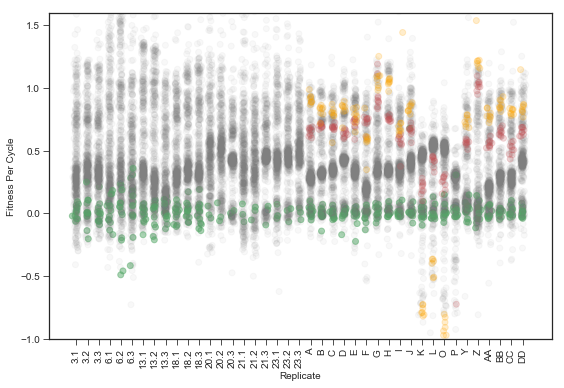

In [57]:
data = merged_data
data = data[~(merged_data['barcode'].isin([7777777,9999999]))]
data = data.sort_values('barcode')

spike_in_missense = [9000000 + i for i in range(11)]
spike_in_nonsense = [9000100 + i for i in range(11)]
neutrals = list(np.unique(full_neutral_list+supergood_neutral+neutral_spikes))

neutrals = [bc for bc in data['barcode'].values if bc in neutrals]
# neutrals = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]
neutral_locs = np.where(np.isin(data['barcode'].values,neutrals))[0]
color_set = []
alphas = []
for bc in data['barcode'].values:
#     print(bc)
    if bc in spike_in_missense:
        color_set.append(colors.to_rgba('r',0.2))
    elif bc in spike_in_nonsense:
        color_set.append(colors.to_rgba('orange',0.2))
    elif bc in neutrals:
        color_set.append(colors.to_rgba('g',0.5))
    elif bc == 9999999:
        color_set.append(colors.to_rgba('k',0.5))
    else:
        color_set.append(colors.to_rgba('gray',0.05))


plt.figure(figsize=(9,6))

for j,condition in enumerate(just_reps):
    plt.scatter([tools.jitter_point(j,0.1) for  i in range(len(fitnesses[f'{condition}_fitness']))],fitnesses[f'{condition}_fitness'],color=color_set)

plt.xticks(range(len(just_reps)),just_reps,rotation=90)
plt.ylim(-1,1.6)
plt.ylabel('Fitness Per Cycle')
plt.xlabel('Replicate')

plt.savefig('all_condition_fitness.pdf',bbox_inches='tight')

# for (i,rep) in just_reps:
#     plt.scatter(jitter)

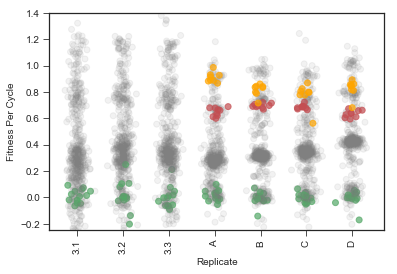

In [67]:
data = merged_data
data = data[~(merged_data['barcode'].isin([7777777,9999999]))]
data = data.sort_values('barcode')

spike_in_missense = [9000000 + i for i in range(11)]
spike_in_nonsense = [9000100 + i for i in range(11)]
neutrals = list(np.unique(full_neutral_list+supergood_neutral+neutral_spikes))

neutrals = [bc for bc in data['barcode'].values if bc in neutrals]
# neutrals = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]
neutral_locs = np.where(np.isin(data['barcode'].values,neutrals))[0]
color_set = []
alphas = []
for bc in data['barcode'].values:
#     print(bc)
    if bc in spike_in_missense:
        color_set.append(colors.to_rgba('r',0.7))
    elif bc in spike_in_nonsense:
        color_set.append(colors.to_rgba('orange',0.7))
    elif bc in neutrals:
        color_set.append(colors.to_rgba('g',0.7))
    elif bc == 9999999:
        color_set.append(colors.to_rgba('k',0.7))
    else:
        color_set.append(colors.to_rgba('gray',0.1))


# plt.figure(figsize=(3,2))

for j,condition in enumerate(['3.1','3.2','3.3','A','B','C','D']):
    plt.scatter([tools.jitter_point(j,0.1) for  i in range(len(fitnesses[f'{condition}_fitness']))],fitnesses[f'{condition}_fitness'],color=color_set)

plt.xticks(range(len(['3.1','3.2','3.3','A','B','C','D'])),['3.1','3.2','3.3','A','B','C','D'],rotation=90)
plt.ylim(-0.25,1.4)
plt.ylabel('Fitness Per Cycle')
plt.xlabel('Replicate')

plt.savefig('3+ABCD_condition_fitness.pdf',bbox_inches='tight')

# for (i,rep) in just_reps:
#     plt.scatter(jitter)

In [22]:
data = merged_data
data = data[~(data['barcode'].isin([7777777,9999999]))]
data = data.sort_values('barcode')
data = data.drop(columns=['L2','6-1-3','6-2-2']) # sparse timepoints resulting a lot of missing data

cov_thresh = 100

### called neutral by atish's method in ALL 5000 bc experiments (I think - need to verify this)
### [could also be below some set threshold across all experiments]
full_neutral_list = [17615,18486,42040,45014,58284,63611,73731,74185,80465,94896
,120600,125697,132511,134852,135750,190551,228237,238783,255561,298344
,308537,316954,317346,335717,411685,454359,469053] 

### from previous list but never has fitness above 3.5% (per gen) in any of 5000bc experiments
supergood_neutral = [17615, 24362, 42040, 71926, 72939, 73802, 80465, 109476, 113483, 
                     134852, 135750, 238783, 263665, 276406, 316954, 335717, 454359] 

### pulled from supergood list and spiked into 1BigBatch experiments
neutral_spikes = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]

# neutrals = full_neutral_list
neutrals = list(np.unique(full_neutral_list+supergood_neutral+neutral_spikes))

neutrals = [bc for bc in data['barcode'].values if bc in neutrals]
# neutrals = neutral_spikes
print(neutrals)

fitnesses = {}

other_info = ['barcode','gene','type','ploidy','class','additional_muts']

for starting_t in range(5):
    for rep in just_reps:

        these_times = []
        timepoints = []
        if rep in tools.flatten([i for i in old_conditions.values()]):

            e,r = rep.split('.')
#             if starting_t == 0:
#                 if e in ['13','15']:
#                     timepoints.append(0)
#                     these_times.append('13-0_pool')
#                 else:
#                     if e+'-0' in data.columns:
#                         timepoints.append(0)
#                         these_times.append(e+'-0')

            for t in range(starting_t,starting_t+2):
                if e+'-'+str(t)+'-'+r in data.columns:
                    timepoints.append(t)
                    these_times.append(e+'-'+str(t)+'-'+r)

        if rep in tools.flatten([i for i in bigbatch_conditions.values()]):
            for i in range(starting_t,starting_t+2):
                if rep+str(i) in data.columns:
                    these_times.append(rep+str(i))
                    timepoints.append(i)
                    
        if len(timepoints) > 1:
            answer = atish.inferFitness(data['barcode'].values,timepoints,{rep:data[these_times].values},
                                    neutralBarcodes=neutrals,lowCoverageThresh=cov_thresh,use_all_neutral=True,useMultNoise=True,weightedMean=False)

            fitnesses[rep+f'_T{starting_t}to{starting_t+1}'+'_fitness'] = answer[rep]['aveFitness']
            fitnesses[rep+f'_T{starting_t}to{starting_t+1}'+'_error'] = answer[rep]['aveError']

    for other_setting in other_info:
        if other_setting in data.columns:
            fitnesses[other_setting] = data[other_setting].values

fitness_df = p.DataFrame(fitnesses)
fitness_df = fitness_df.replace([np.inf, -np.inf], np.nan)
# fitness_df = fitness_df.replace([float('Inf'),-float('Inf'),np.inf, -np.inf], np.nan)

for condition in conditions:
    fitness_df[f'{condition}_fitness'] = np.nanmean(fitness_df[[col for col in fitness_df if col.split('_')[0] in conditions[condition] if '_fitness' in col ]].values ,axis=1)
    
fitness_df = fitness_df[other_info+[col for col in fitness_df if col not in other_info]]
fitness_df.to_csv('../data/DoubleBC_Merged_Fitness_NoWeight_AllConditions_ByTimepoint.csv',index=False)



[17615, 24362, 42040, 71926, 72939, 73802, 109476, 113483, 120600, 134852, 263665, 298344, 316954]
2
neutral reads 10696.0 1599.0
neutral reads 10696.0 1599.0
Multiplicative noise consistency checks

21.1  inconsistent times:

kappas [6.94462541]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 9781.0 1019.0
neutral reads 9781.0 1018.0
Multiplicative noise consistency checks

21.2  inconsistent times:

kappas [18.02825322]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 49279.0 47984.0
neutral reads 49279.0 47984.0
Multiplicative noise consistency checks

A  inconsistent times:

kappas [22.50760306]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 163396.0 20159.0
neutral reads 163396.0 20159.0
Multiplicative noise consistency checks

B  inconsistent times:

kappas [15.32883373]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 22513.0 60230.0
neutral reads 22513.0 60230.0
Multiplicative noise consistency checks

C  inconsistent times:

kappas [19.03

/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:219: RuntimeWarning: divide by zero encountered in power
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:219: RuntimeWarning: invalid value encountered in multiply
  zScores = zScores*np.power(expectedReads,-0.5)
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:386: RuntimeWarning: divide by zero encountered in log
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_assay_grantedits.py:386: RuntimeWarning: invalid value encountered in subtract
  allTimeFitness = np.log(allReads[repName][:,1:]/totReads[1:])-np.log(allReads[repName][:,0:-1]/totReads[0:-1])
/Users/grantkinsler/Documents/Stanford/Research/TheoryPaper/code/fitness_a

Multiplicative noise consistency checks

23.2  inconsistent times:

kappas [12.92087]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 4793.0 3764.0
neutral reads 4793.0 3763.0
Multiplicative noise consistency checks

23.3  inconsistent times:

kappas [3.21657572]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 47984.0 44600.0
neutral reads 47984.0 44600.0
Multiplicative noise consistency checks

A  inconsistent times:

kappas [10.39824995]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 20159.0 89144.0
neutral reads 20159.0 89144.0
Multiplicative noise consistency checks

B  inconsistent times:

kappas [33.35153686]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 60230.0 78877.0
neutral reads 60230.0 78877.0
Multiplicative noise consistency checks

C  inconsistent times:

kappas [36.78004103]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 41324.0 15145.0
neutral reads 41324.0 15145.0
Multiplicative noise consistency checks

D  inconsis

Multiplicative noise consistency checks

13.1  inconsistent times:

kappas [1.55358576]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 1540.0 238.0
neutral reads 1540.0 238.0
Multiplicative noise consistency checks

13.2  inconsistent times:

kappas [0.76077469]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 1633.0 290.0
neutral reads 1633.0 290.0
Multiplicative noise consistency checks

13.3  inconsistent times:

kappas [0.56820968]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 1915.0 1799.0
neutral reads 1915.0 1799.0
Multiplicative noise consistency checks

18.1  inconsistent times:

kappas [1.79167277]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 549.0 1979.0
neutral reads 549.0 1979.0
Multiplicative noise consistency checks

18.2  inconsistent times:

kappas [5.04867877]
multNoise [0.1]
No clear inconsistencies

2
neutral reads 3240.0 1559.0
neutral reads 3240.0 1559.0
Multiplicative noise consistency checks

18.3  inconsistent times:

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:76: RuntimeWarning: Mean of empty slice


In [17]:
conditions

{'13': ['13.1', '13.2', '13.3'],
 '18': ['18.1', '18.2', '18.3'],
 '1BB_0.2MKCl': ['O'],
 '1BB_0.2MNaCl': ['K'],
 '1BB_0.5%Raf': ['AA', 'BB'],
 '1BB_0.5MKCl': ['P'],
 '1BB_0.5MNaCl': ['M', 'N'],
 '1BB_1%Gly': ['CC', 'DD'],
 '1BB_1%Raf': ['Y', 'Z'],
 '1BB_1.4%Gluc': ['G', 'H'],
 '1BB_1.8%Gluc': ['I', 'J'],
 '1BB_Baffle': ['E', 'F'],
 '1BB_M3': ['A', 'B', 'C', 'D'],
 '20': ['20.1', '20.2', '20.3'],
 '21': ['21.1', '21.2', '21.3'],
 '23': ['23.1', '23.2', '23.3'],
 '3': ['3.1', '3.2', '3.3'],
 '6': ['6.1', '6.2', '6.3']}

In [21]:
[col for col in fitness_df if col.split('_')[0] in conditions['1BB_M3'] if '_fitness' in col ]

['A_T0to1_fitness',
 'A_T1to2_fitness',
 'A_T2to3_fitness',
 'A_T3to4_fitness',
 'B_T0to1_fitness',
 'B_T1to2_fitness',
 'B_T2to3_fitness',
 'B_T3to4_fitness',
 'C_T0to1_fitness',
 'C_T1to2_fitness',
 'C_T2to3_fitness',
 'C_T3to4_fitness',
 'D_T0to1_fitness',
 'D_T1to2_fitness',
 'D_T2to3_fitness',
 'D_T3to4_fitness']

In [20]:
np.nanmean(fitness_df[[col for col in fitness_df if col.split('_')[0] in conditions['1BB_M3'] if '_fitness' in col ]].values ,axis=1)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


array([ 3.49258650e-01,  1.00757725e+00,  3.44703015e-01,  8.27608957e-01,
        7.56085135e-01,  9.88022495e-01, -1.87915702e+00,  3.29383980e-01,
        1.02258327e+00,  3.21021931e-01, -5.78612539e-01,             nan,
        9.61641679e-01,  9.64540180e-01,  3.07970217e-01,  7.28691060e-01,
        7.67934792e-02,  6.80017174e-03,  7.40677100e-01,  3.28808353e-01,
        3.93014856e-01,  7.46807528e-01,  7.95787800e-01,  4.99664050e-01,
        7.08997736e-01,  3.67186825e-01,  4.72344977e-01,  8.55621408e-01,
        3.39705295e-01, -5.46531466e-01,  3.34310785e-01,  6.64296535e-01,
        5.67991600e-01,  2.06329518e-01,  3.17034327e-01,  8.18346275e-01,
        1.02311186e+00,  3.61053151e-01,  3.46469275e-01,  3.14195765e-01,
        5.20643537e-01,  8.06490904e-01,  7.86542045e-01,  3.30134264e-01,
        7.57644886e-01, -9.84077647e-01,  8.49085423e-01,  7.34815691e-01,
        5.05117947e-01,  6.58479808e-01,             nan,  3.21061526e-01,
        6.33796337e-01, -

In [40]:
fitness_df.replace([np.inf, -np.inf], np.nan).dropna()

barcode            gene                type        ploidy  \
0         53         Diploid             Diploid       Diploid   
1        151            IRA1         stop_gained       Haploid   
2        262    NotSequenced        NotSequenced  NotSequenced   
3        273            IRA1  frameshift_variant       Haploid   
4        323    NotSequenced        NotSequenced  NotSequenced   
5        415            IRA1  frameshift_variant       Haploid   
8        689            IRA1  frameshift_variant       Haploid   
9        697    NotSequenced        NotSequenced  NotSequenced   
12      1379    NotSequenced        NotSequenced  NotSequenced   
13      1488    NotSequenced        NotSequenced  NotSequenced   
14      1564         Diploid             Diploid       Diploid   
15      1617            PDE2  frameshift_variant       Haploid   
16      1641           other               other         other   
17      1683           other               other         other   
18      1866            PDE2         stop_gained       Haploid   
19      2037         Diploid             Diploid       Diploid   
20      2039  Diploid + IRA2  frameshift_variant       Diploid   
21      2288            GPB2         stop_gained       Haploid   
22      2468            IRA2    missense_variant       Haploid   
23      2608            GPB1  frameshift_variant       Haploid   
24      2768            GPB2         stop_gained       Haploid   
25      2776         Diploid             Diploid       Diploid   
26      2808         Diploid             Diploid       Diploid   
28      3250    NotSequenced        NotSequenced  NotSequenced   
30      3379         Diploid             Diploid       Diploid   
33      3577  Diploid + IRA2    missense_variant       Diploid   
34      3585         Diploid             Diploid       Diploid   
35      3675            IRA1    missense_variant       Haploid   
36      3730    NotSequenced        NotSequenced  NotSequenced   
37      3920         Diploid             Diploid       Diploid   
..       ...             ...                 ...           ...   
474   298344           other               other         other   
475   303501           other               other         other   
476   304483           other               other         other   
477   304935    NotSequenced        NotSequenced  NotSequenced   
478   309605    NotSequenced        NotSequenced  NotSequenced   
479   309655            PDE2  frameshift_variant       Haploid   
480   310209         Diploid             Diploid       Diploid   
481   316048           other               other         other   
483   317672         Diploid             Diploid       Diploid   
484   319196    NotSequenced        NotSequenced  NotSequenced   
485   328579         Diploid             Diploid       Diploid   
486   329774         Diploid             Diploid       Diploid   
487   330943           other               other         other   
490   334616           other               other         other   
491   336972            SCH9    missense_variant       Haploid   
492   338908         Diploid             Diploid       Diploid   
493   340123    NotSequenced        NotSequenced  NotSequenced   
496   349198    NotSequenced        NotSequenced  NotSequenced   
497   349927    NotSequenced        NotSequenced  NotSequenced   
498   352078           other               other         other   
503   375115         Diploid             Diploid       Diploid   
505   379777            IRA2    missense_variant       Haploid   
506   381707           other               other         other   
508   392361         Diploid             Diploid       Diploid   
514   419648           other               other         other   
515   419831         Diploid             Diploid       Diploid   
516   425471         Diploid             Diploid       Diploid   
518   430247           other               other         other   
520   434397         Diploid             Dipl

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'Y',
 'Z',
 'O',
 'P',
 'AA',
 'BB',
 'CC',
 'DD']

In [13]:
[i for i in range(1,3)]

[1, 2]

In [124]:
fitness_df.replace([np.inf, -np.inf], np.nan)

barcode            gene                type        ploidy  \
0         53         Diploid             Diploid       Diploid   
1        151            IRA1         stop_gained       Haploid   
2        262    NotSequenced        NotSequenced  NotSequenced   
3        273            IRA1  frameshift_variant       Haploid   
4        323    NotSequenced        NotSequenced  NotSequenced   
5        415            IRA1  frameshift_variant       Haploid   
6        499    NotSequenced        NotSequenced  NotSequenced   
7        622    NotSequenced        NotSequenced  NotSequenced   
8        689            IRA1  frameshift_variant       Haploid   
9        697    NotSequenced        NotSequenced  NotSequenced   
10      1185    NotSequenced        NotSequenced  NotSequenced   
11      1322    NotSequenced        NotSequenced  NotSequenced   
12      1379    NotSequenced        NotSequenced  NotSequenced   
13      1488    NotSequenced        NotSequenced  NotSequenced   
14      1564         Diploid             Diploid       Diploid   
15      1617            PDE2  frameshift_variant       Haploid   
16      1641           other               other         other   
17      1683           other               other         other   
18      1866            PDE2         stop_gained       Haploid   
19      2037         Diploid             Diploid       Diploid   
20      2039  Diploid + IRA2  frameshift_variant       Diploid   
21      2288            GPB2         stop_gained       Haploid   
22      2468            IRA2    missense_variant       Haploid   
23      2608            GPB1  frameshift_variant       Haploid   
24      2768            GPB2         stop_gained       Haploid   
25      2776         Diploid             Diploid       Diploid   
26      2808         Diploid             Diploid       Diploid   
27      3160    NotSequenced        NotSequenced  NotSequenced   
28      3250    NotSequenced        NotSequenced  NotSequenced   
29      3298    NotSequenced        NotSequenced  NotSequenced   
..       ...             ...                 ...           ...   
518   430247           other               other         other   
519   433489    NotSequenced        NotSequenced  NotSequenced   
520   434397         Diploid             Diploid       Diploid   
521   454012    NotSequenced        NotSequenced  NotSequenced   
522   454851           other               other         other   
523   465343    NotSequenced        NotSequenced  NotSequenced   
524   467348    NotSequenced        NotSequenced  NotSequenced   
525   469646    NotSequenced        NotSequenced  NotSequenced   
526   480412    NotSequenced        NotSequenced  NotSequenced   
527   481885    NotSequenced        NotSequenced  NotSequenced   
528   488655    NotSequenced        NotSequenced  NotSequenced   
529   490448    NotSequenced        NotSequenced  NotSequenced   
530  9000001            IRA1            missense       Haploid   
531  9000002            IRA1            missense       Haploid   
532  9000003            IRA1            missense       Haploid   
533  9000005            IRA1            missense       Haploid   
534  9000006            IRA1            missense       Haploid   
535  9000007            IRA1            missense       Haploid   
536  9000008            IRA1            missense       Haploid   
537  9000009            IRA1            missense       Haploid   
538  9000010            IRA1            missense       Haploid   
539  9000101            IRA1         stop_gained       Haploid   
540  9000103            IRA1         stop_gained       Haploid   
541  9000104            IRA1         stop_gained       Haploid   
542  9000105            IRA1         stop_gained       Haploid   
543  9000106            IRA1         stop_gained       Haploid   
544  9000107            IRA1         stop_gained       Haploid   
545  9000108            IRA1         stop_gained       Haploid   
546  9000109            IRA1         stop_gai

In [113]:
data

13-0  13-0_pool   13-1-1   13-1-2   13-1-3    13-2-1    13-2-2  \
0       2.0       10.0    512.0    700.0    594.0     594.0     403.0   
1    2625.0     3914.0  43106.0  54385.0  42068.0  160273.0  107883.0   
2      15.0       46.0   2909.0   2977.0   2776.0    2582.0    1640.0   
3     710.0     1187.0  36510.0  32361.0  30864.0   92924.0   59293.0   
4     373.0      631.0  21956.0  23483.0  22294.0   46277.0   33707.0   
5      88.0      165.0   2745.0   4386.0   3120.0    7695.0    7096.0   
6      48.0      104.0   2335.0   3792.0   3057.0    5985.0    5549.0   
7       0.0        3.0     64.0     57.0     65.0      81.0      27.0   
8     170.0      278.0   5462.0   7846.0   6551.0   15647.0   11789.0   
9       6.0        5.0    937.0   1094.0    910.0     936.0     601.0   
10    530.0     1020.0  17086.0  24185.0  16862.0   46192.0   35597.0   
11     60.0       88.0   2692.0   3183.0   2970.0    7467.0    5616.0   
12   2487.0     4607.0  62196.0  82157.0  66626.0  206547.0  148874.0   
13    355.0      663.0  13177.0  17075.0  15191.0   36337.0   26190.0   
14      4.0       10.0    601.0    785.0    745.0     729.0     436.0   
15     86.0      158.0   5419.0   3979.0   4138.0   11600.0    7264.0   
16      4.0       19.0    973.0    971.0    905.0     759.0     467.0   
17      1.0       13.0    483.0    445.0    439.0     344.0     221.0   
18     26.0       34.0   2302.0   2214.0   2286.0    4108.0    2938.0   
19      3.0       15.0    985.0    909.0    868.0    1212.0     744.0   
20     14.0       28.0   1742.0   2231.0   1853.0    2671.0    2260.0   
21     52.0       74.0   3765.0   3849.0   3389.0    7466.0    4876.0   
22     11.0       32.0   1400.0   1741.0   1406.0    2402.0    1814.0   
23      8.0       10.0   1329.0   1473.0   1450.0    1670.0    1202.0   
24    284.0      501.0  17004.0  16808.0  14985.0   38098.0   26081.0   
25      5.0        5.0    622.0    708.0    616.0     660.0     499.0   
26     10.0       21.0   1913.0   2489.0   1846.0    2032.0    1490.0   
27      0.0        0.0      1.0      0.0      0.0       1.0       1.0   
28      6.0       10.0    999.0    986.0    938.0    1119.0     703.0   
29     75.0      108.0   5896.0   7235.0   6890.0   11578.0    9045.0   
..      ...        ...      ...      ...      ...       ...       ...   
508     0.0        3.0    144.0    133.0     97.0     105.0      90.0   
509     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
510     1.0        3.0    524.0    526.0    515.0     525.0     302.0   
511     0.0        0.0      0.0      0.0      0.0       1.0       2.0   
512     2.0        6.0    660.0    705.0    613.0     428.0     364.0   
513     0.0        0.0      1.0      1.0      0.0       1.0       2.0   
514     1.0        0.0      0.0      1.0      1.0       4.0       3.0   
515     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
516     0.0        0.0      1.0      0.0      0.0       0.0       0.0   
517     0.0        0.0      0.0      0.0      0.0       0.0       3.0   
518     1.0        0.0     20.0      7.0     13.0      31.0      43.0   
519     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
530     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
531     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
532     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
533     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
534     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
535     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
536     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
537     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
538     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
539     0.0        0.0      0.0      0.0      0.0       0.0       0.0   
540     0.0        0.0      0.0      0.0      0.0       0.0      

In [95]:
np.sum(fitness_df['3.1_fitness'].values/fitness_df['3.1_error'].values)/(np.sum(1/fitness_df['3.1_error'].values))

nan

(-0.4, 1.6)

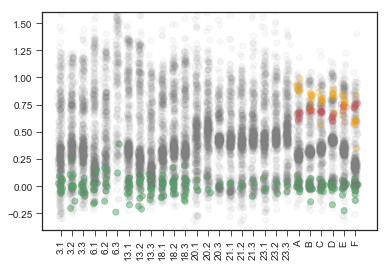

In [52]:
data = merged_data
data = data[~(merged_data['barcode'].isin([7777777,9999999]))]
data = data.sort_values('barcode')

spike_in_missense = [9000000 + i for i in range(11)]
spike_in_nonsense = [9000100 + i for i in range(11)]
neutrals = list(np.unique(full_neutral_list+supergood_neutral+neutral_spikes))

neutrals = [bc for bc in data['barcode'].values if bc in neutrals]
# neutrals = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]
neutral_locs = np.where(np.isin(data['barcode'].values,neutrals))[0]
color_set = []
alphas = []
for bc in data['barcode'].values:
#     print(bc)
    if bc in spike_in_missense:
        color_set.append(colors.to_rgba('r',0.2))
    elif bc in spike_in_nonsense:
        color_set.append(colors.to_rgba('orange',0.2))
    elif bc in neutrals:
        color_set.append(colors.to_rgba('g',0.5))
    elif bc == 9999999:
        color_set.append(colors.to_rgba('k',0.5))
    else:
        color_set.append(colors.to_rgba('gray',0.05))



for j,condition in enumerate(just_reps):
    plt.scatter([jitter_point(j,0.1) for  i in range(len(fitnesses[f'{condition}_fitness']))],fitnesses[f'{condition}_fitness'],color=color_set)

plt.xticks(range(len(just_reps)),just_reps,rotation=90)
plt.ylim(-0.4,1.6)
# plt.savefig('AllM3_conditions_fitness_allTPs.png',bbox_inches='tight',dpi=300)

(-0.4, 1.6)

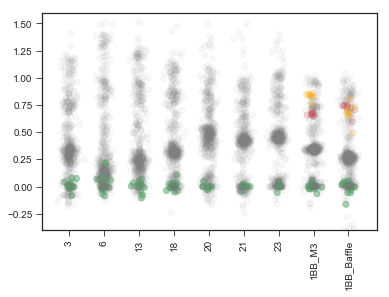

In [105]:
data = merged_data
data = data[~(merged_data['barcode'].isin([7777777,9999999]))]
data = data.sort_values('barcode')

spike_in_missense = [9000000 + i for i in range(11)]
spike_in_nonsense = [9000100 + i for i in range(11)]
neutrals = list(np.unique(full_neutral_list+supergood_neutral+neutral_spikes))

neutrals = [bc for bc in data['barcode'].values if bc in neutrals]
# neutrals = [17615,24362,42040,71926,73802,109476,113483,134852,263665,316954]
neutral_locs = np.where(np.isin(data['barcode'].values,neutrals))[0]
color_set = []
alphas = []
for bc in data['barcode'].values:
#     print(bc)
    if bc in spike_in_missense:
        color_set.append(colors.to_rgba('r',0.2))
    elif bc in spike_in_nonsense:
        color_set.append(colors.to_rgba('orange',0.2))
    elif bc in neutrals:
        color_set.append(colors.to_rgba('g',0.5))
    elif bc == 9999999:
        color_set.append(colors.to_rgba('k',0.5))
    else:
        color_set.append(colors.to_rgba('gray',0.05))



for j,condition in enumerate(conditions.keys()):
    plt.scatter([jitter_point(j,0.1) for  i in range(len(fitness_df[f'{condition}_fitness'].values))],fitness_df[f'{condition}_fitness'].values,color=color_set)

plt.xticks(range(len(conditions.keys())),conditions.keys(),rotation=90)
plt.ylim(-0.4,1.6)
# plt.savefig('AllM3_conditions_fitness_allTPs.png',bbox_inches='tight',dpi=300)

In [58]:
data[(data.T != 0).all()]

13-0  13-0_pool  13-1-1  13-1-2  13-1-3  13-2-1  13-2-2  13-2-3  13-3-1  \
170   1.0        9.0   487.0   417.0   411.0   641.0   308.0    82.0   366.0   
259   6.0       15.0  1188.0  1252.0   969.0  1281.0   906.0   183.0   706.0   
273   3.0       15.0   953.0  1322.0  1178.0  1134.0   780.0   168.0   705.0   

     13-3-2   ...         Y1      Y2      Y3      Y4     Z0      Z1     Z2  \
170   245.0   ...     1782.0  7301.0  2451.0  1094.0  920.0  1297.0  562.0   
259   554.0   ...      859.0  3131.0  1197.0   433.0  279.0   461.0  108.0   
273   406.0   ...     1364.0  5769.0  2309.0   762.0  614.0  1201.0  286.0   

       Z3     Z4  barcode  
170  24.0  204.0    27346  
259   5.0   81.0    60973  
273  14.0  133.0    67711  

[3 rows x 200 columns]

In [59]:
# merged_data[merged_data['barcode']==151].values

data.columns[175]

'L2'

In [84]:
nol2 = data.drop(columns=['L2','6-1-3'])
# nol2[(nol2.T != 0).all()]

In [74]:
zipping = [(col,count) for col,count in zip(nol2.columns,nol2[(nol2.T != 0).all()].sum(axis=0).values)]

In [77]:
sorted(zipping,key=lambda x:x[1])

[('6-1-3', 1706.0),
 ('13-0', 17089.0),
 ('13-0_pool', 29945.0),
 ('6-2-2', 38744.0),
 ('Z3', 48849.0),
 ('18-2-1', 77829.0),
 ('P3', 102466.0),
 ('18-1-3', 130171.0),
 ('L3', 135522.0),
 ('O3', 136135.0),
 ('Tneg', 142796.0),
 ('P4', 155387.0),
 ('20-1-1', 182295.0),
 ('K3', 190068.0),
 ('DD1', 193037.0),
 ('18-2-2', 196767.0),
 ('18-1-2', 197430.0),
 ('18-1-1', 212776.0),
 ('GG3', 230861.0),
 ('H3', 232707.0),
 ('L4', 245655.0),
 ('I3', 252171.0),
 ('DD2', 262324.0),
 ('K4', 262700.0),
 ('GG2', 272032.0),
 ('13-2-3', 274832.0),
 ('Z0', 277905.0),
 ('K0', 280732.0),
 ('J3', 293184.0),
 ('21-1-2', 293431.0),
 ('CC3', 321465.0),
 ('O4', 322399.0),
 ('21-2-2', 340053.0),
 ('GG4', 340458.0),
 ('BB3', 349249.0),
 ('G3', 358030.0),
 ('AA3', 361639.0),
 ('G0', 375831.0),
 ('21-1-1', 385876.0),
 ('H0', 389695.0),
 ('21+wt', 409864.0),
 ('J0', 444569.0),
 ('DD3', 444576.0),
 ('DD4', 467601.0),
 ('3-0', 471223.0),
 ('BB4', 486831.0),
 ('J4', 518203.0),
 ('CC2', 521633.0),
 ('18-3-2', 527574.0),

In [90]:
# data = data.drop(columns=['L2','6-1-3'])

zipping = [(col,len(data[col].values)-np.count_nonzero(data[col])) for col in data.columns]
sorted(zipping,key=lambda x:x[1],reverse=True)

[('6-2-2', 172),
 ('13-0', 104),
 ('P3', 83),
 ('P4', 82),
 ('Z3', 81),
 ('23-4-3', 78),
 ('21+wt', 74),
 ('21-0-4', 74),
 ('O3', 74),
 ('21-2-2', 73),
 ('23-1-2', 73),
 ('L3', 73),
 ('21-0-1', 72),
 ('P2', 72),
 ('K3', 71),
 ('21-0-2', 70),
 ('23-0', 70),
 ('23-2-1', 70),
 ('BB4', 70),
 ('L4', 70),
 ('DD2', 69),
 ('Tneg', 69),
 ('K4', 68),
 ('21-4-1', 67),
 ('GG3', 67),
 ('GG4', 67),
 ('13-0_pool', 66),
 ('20-1-1', 66),
 ('23-1-1', 66),
 ('23-1-3', 66),
 ('DD1', 66),
 ('DD4', 66),
 ('G3', 66),
 ('H3', 66),
 ('O4', 66),
 ('P1', 66),
 ('23-3-2', 65),
 ('BB3', 65),
 ('I3', 65),
 ('AA3', 64),
 ('AA4', 64),
 ('E3', 64),
 ('21-4-3', 63),
 ('CC4', 63),
 ('GG2', 63),
 ('Z0', 63),
 ('21-1-2', 62),
 ('CC3', 62),
 ('D3', 62),
 ('J3', 62),
 ('K2', 62),
 ('23-3-3', 61),
 ('F0', 61),
 ('G0', 61),
 ('J0', 61),
 ('CC2', 60),
 ('DD3', 60),
 ('J4', 60),
 ('K0', 60),
 ('20-3-2', 59),
 ('A3', 59),
 ('O2', 59),
 ('23-3-1', 58),
 ('B1', 58),
 ('E2', 58),
 ('F2', 58),
 ('F3', 58),
 ('GG1', 58),
 ('I4', 58),